In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [92]:
# Load the dataset
file_path = '/content/drive/MyDrive/Churn_Modelling.csv'
data = pd.read_csv(file_path)

In [93]:
# Basic statistics and info
print("Basic Info:")
print(data.info())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [94]:
print("Basic Info:")
print(data.head())


Basic Info:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4

In [95]:
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min   

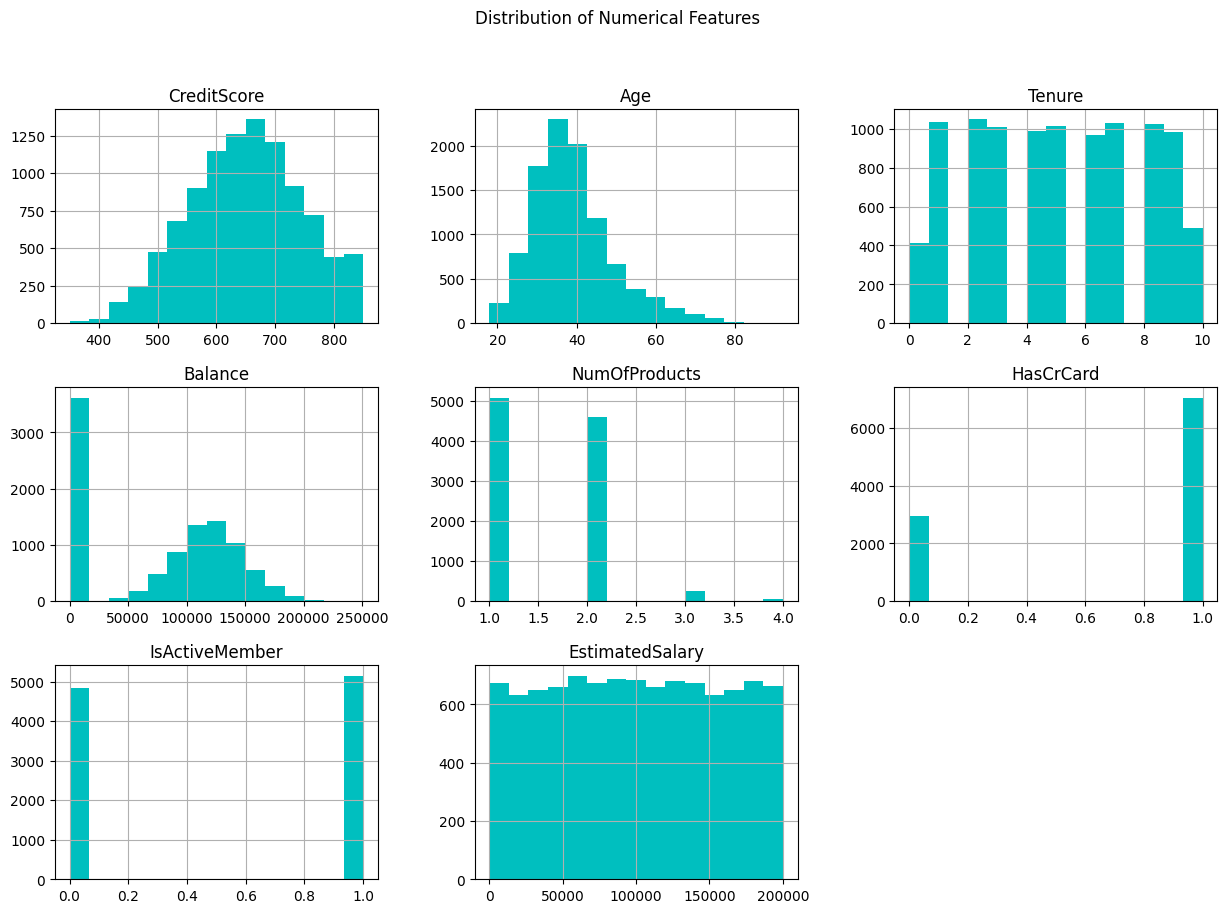

In [96]:
# Distribution of numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
data[numerical_features].hist(bins=15, figsize=(15, 10),color='c')
plt.suptitle('Distribution of Numerical Features')
plt.show()

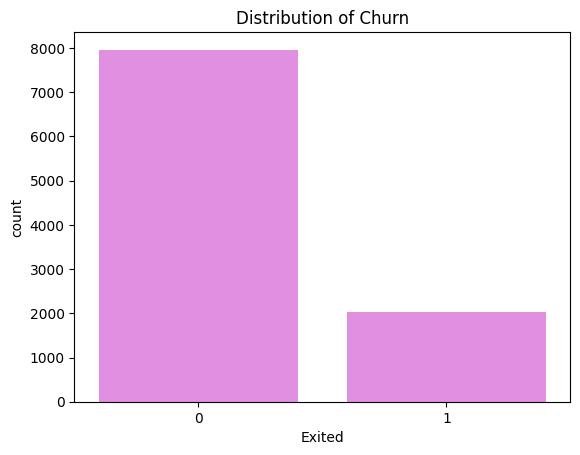

In [97]:
# Distribution of target variable
sns.countplot(x='Exited', data=data,color='violet')
plt.title('Distribution of Churn')
plt.show()


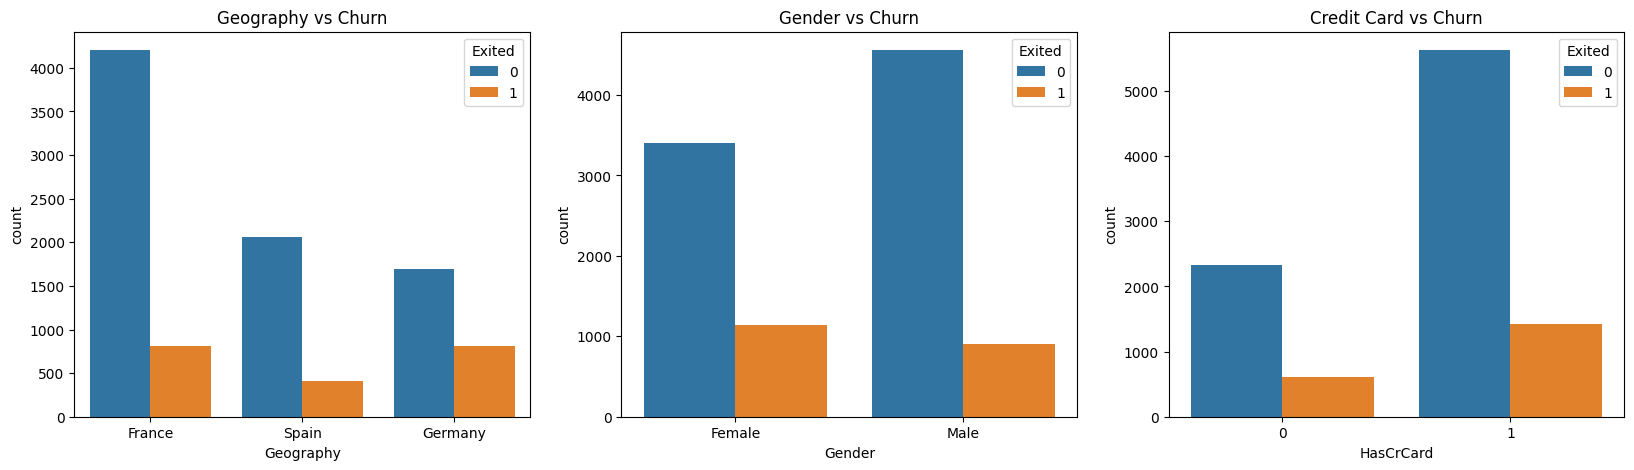

In [98]:
# Categorical features distribution
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.countplot(x='Geography', hue='Exited', data=data, ax=axes[0])
axes[0].set_title('Geography vs Churn')
sns.countplot(x='Gender', hue='Exited', data=data, ax=axes[1])
axes[1].set_title('Gender vs Churn')
sns.countplot(x='HasCrCard', hue='Exited', data=data, ax=axes[2])
axes[2].set_title('Credit Card vs Churn')
plt.show()

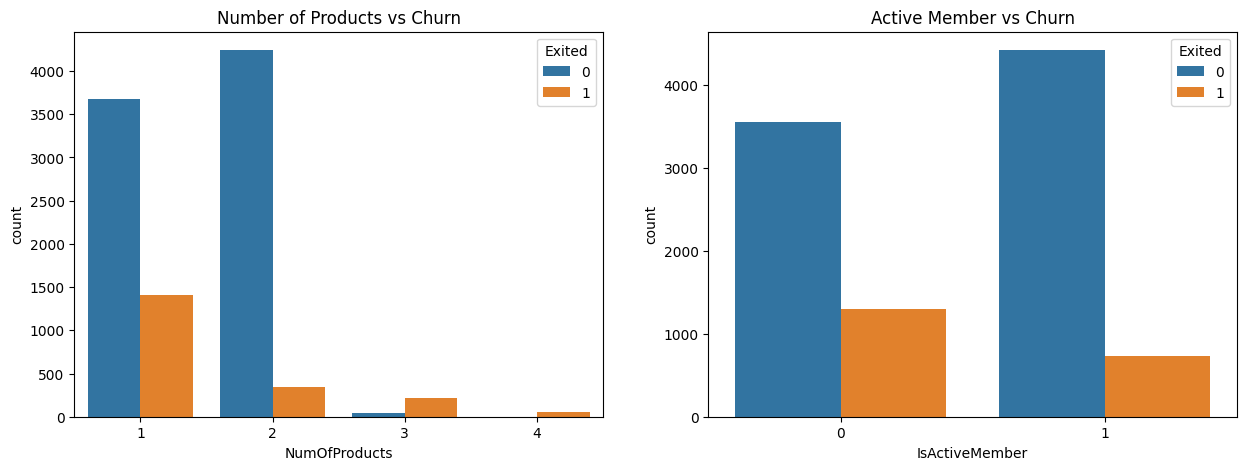

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x='NumOfProducts', hue='Exited', data=data, ax=axes[0])
axes[0].set_title('Number of Products vs Churn')
sns.countplot(x='IsActiveMember', hue='Exited', data=data, ax=axes[1])
axes[1].set_title('Active Member vs Churn')
plt.show()

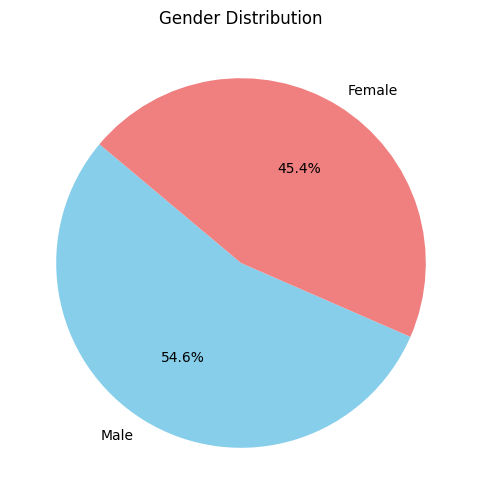

In [100]:
# Pie chart for Gender Distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()


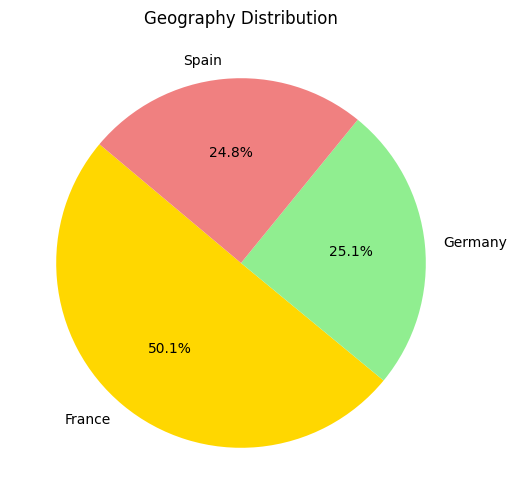

In [101]:
# Pie chart for Geography Distribution
geography_counts = data['Geography'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral'])
plt.title('Geography Distribution')
plt.show()


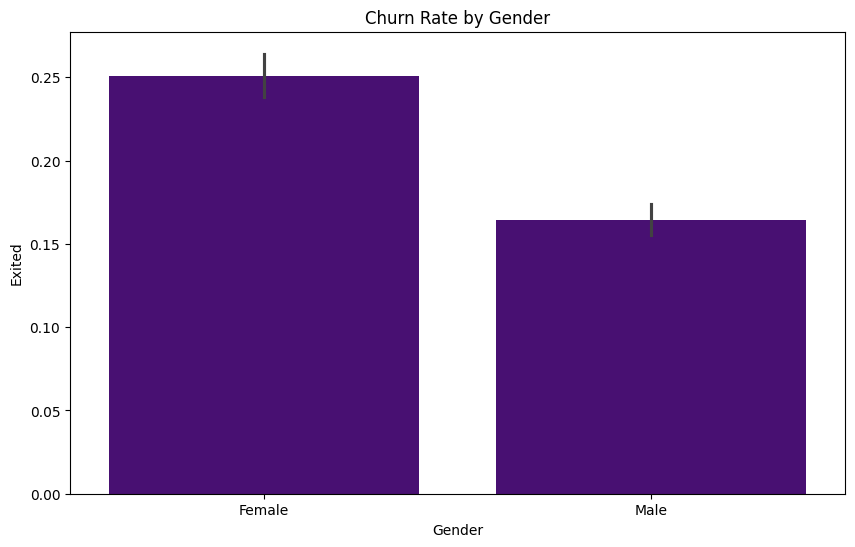

In [102]:
# Bar plot for Exited vs Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Exited', data=data,color='indigo')
plt.title('Churn Rate by Gender')
plt.show()


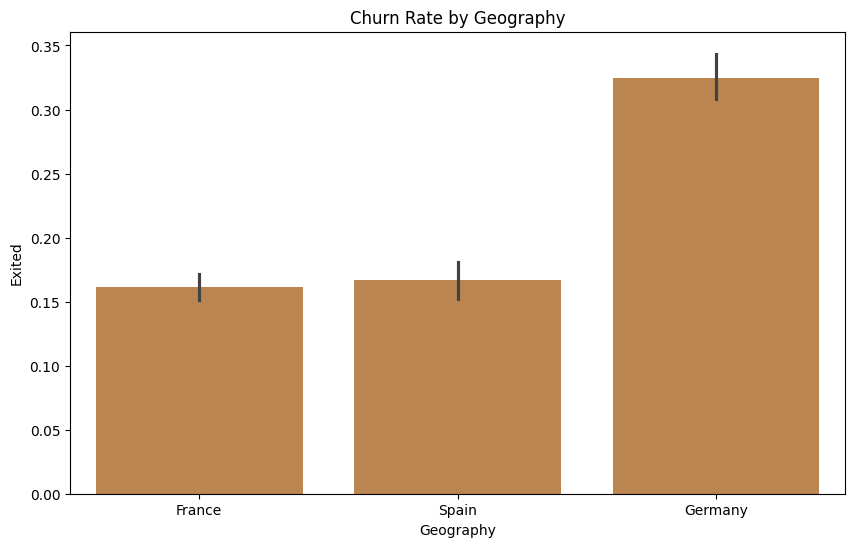

In [103]:
# Bar plot for Exited vs Geography
plt.figure(figsize=(10, 6))
sns.barplot(x='Geography', y='Exited', data=data,color='peru')
plt.title('Churn Rate by Geography')
plt.show()


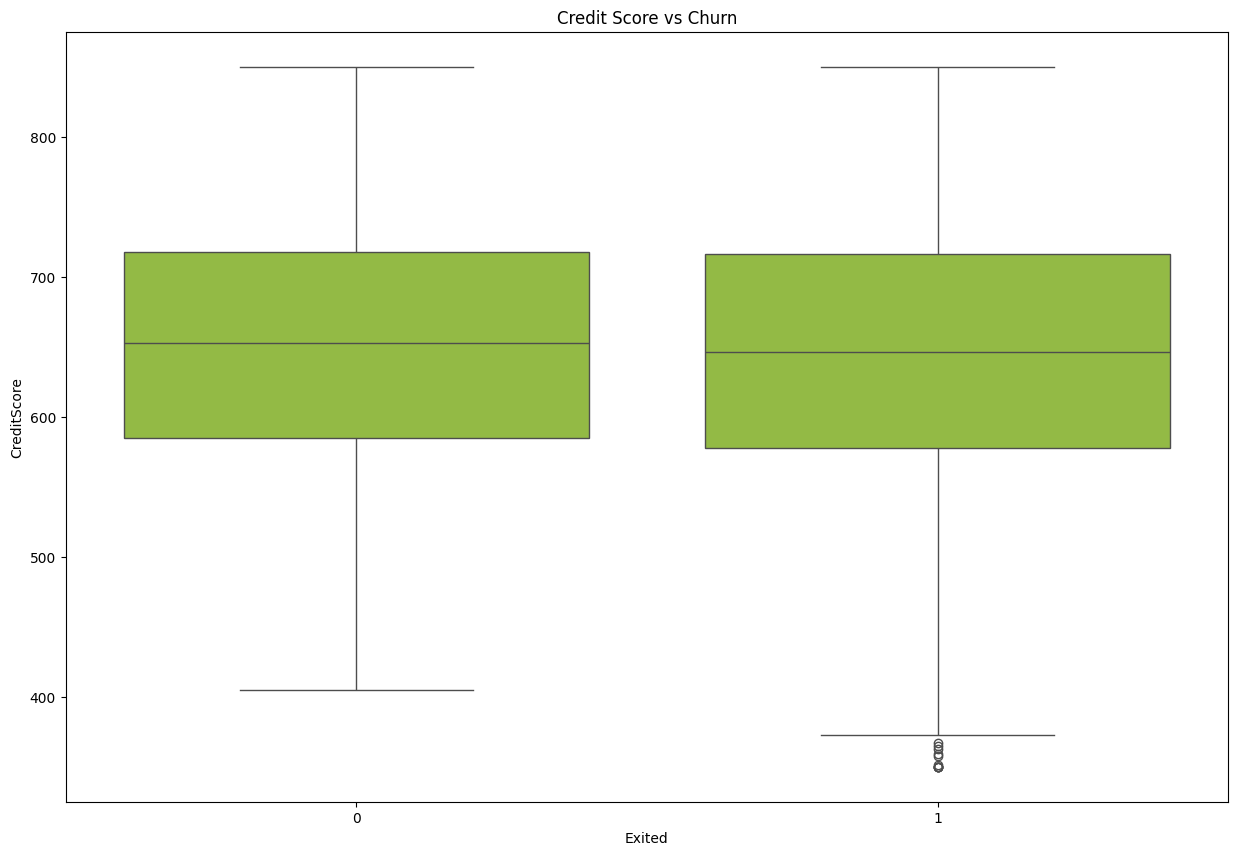

In [104]:
# Box plots to examine relationships between numerical features and churn
plt.figure(figsize=(15, 10))
sns.boxplot(x='Exited', y='CreditScore', data=data,color='yellowgreen')
plt.title('Credit Score vs Churn')
plt.show()

In [105]:
# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [106]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)


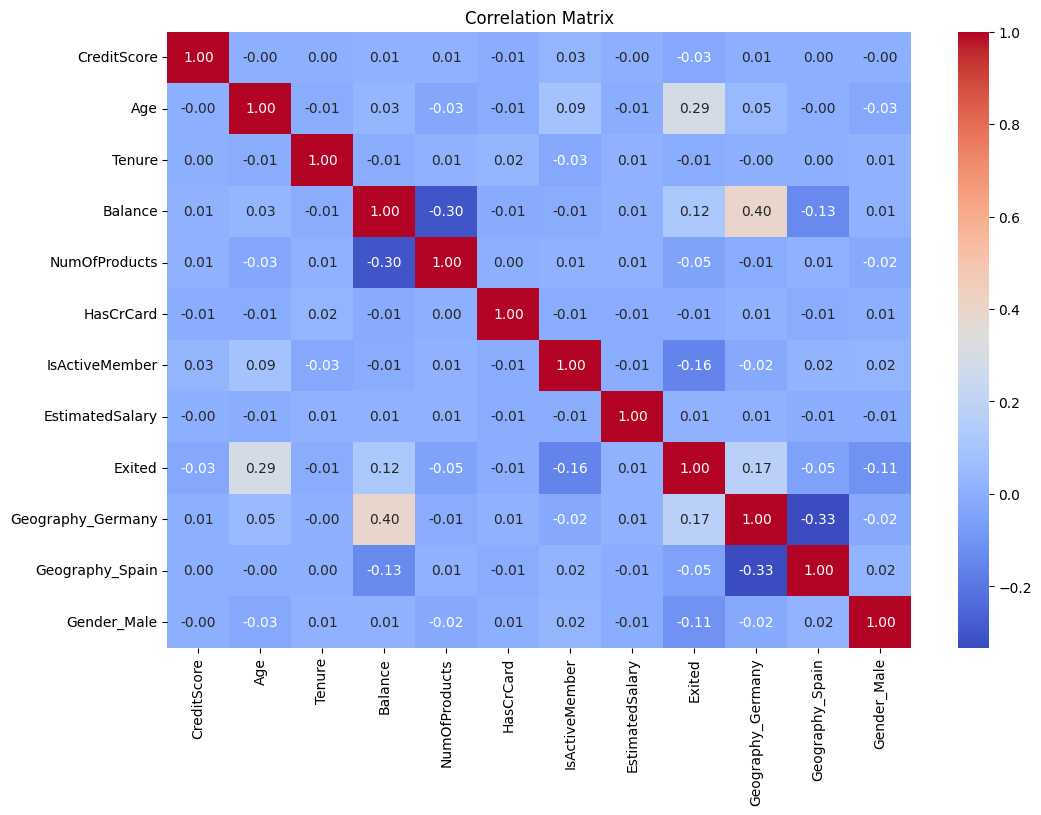

In [107]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

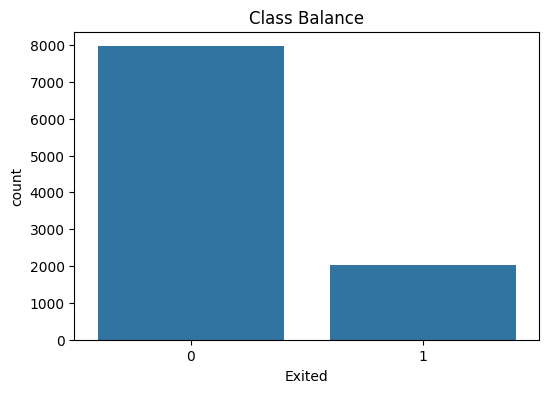

In [108]:
# Class balance
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Exited')
plt.title('Class Balance')
plt.show()

In [109]:
# Define features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

In [110]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
# Initialize the models
log_reg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

In [113]:
# Train the models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [114]:
# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [115]:
# Evaluate the models
report_log_reg = classification_report(y_test, y_pred_log_reg)
report_rf = classification_report(y_test, y_pred_rf)
report_gb = classification_report(y_test, y_pred_gb)

In [116]:
print("Logistic Regression:\n", report_log_reg)
print("Random Forest:\n", report_rf)
print("Gradient Boosting:\n", report_gb)


Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Gradient Boosting:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg    

In [117]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [118]:
# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 0.9]
}

In [119]:
# RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=param_grid_rf,
                                      n_iter=20,
                                      cv=3,
                                      n_jobs=-1,
                                      verbose=2,
                                      scoring='accuracy',
                                      random_state=42)


In [120]:
# RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                      param_distributions=param_grid_gb,
                                      n_iter=20,
                                      cv=3,
                                      n_jobs=-1,
                                      verbose=2,
                                      scoring='accuracy',
                                      random_state=42)


In [121]:
# Fit the models
random_search_rf.fit(X_train, y_train)
random_search_gb.fit(X_train, y_train)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 4],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.8, 0.9]},
                   random_state=42, scoring='accuracy', verbose=2)

In [122]:
# Get the best estimators
best_rf = random_search_rf.best_estimator_
best_gb = random_search_gb.best_estimator_


In [123]:
# Make predictions with the best models
y_pred_best_rf = best_rf.predict(X_test)
y_pred_best_gb = best_gb.predict(X_test)


In [124]:
# Evaluate the best models
report_best_rf = classification_report(y_test, y_pred_best_rf)
report_best_gb = classification_report(y_test, y_pred_best_gb)

In [125]:
print("Best Random Forest Classifier:\n", report_best_rf)
print("Best Gradient Boosting Classifier:\n", report_best_gb)


Best Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000

Best Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.48      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

